# Student Performance Analysis

Analyze the performance of students in programming courses using Python. This could involve tracking grades, attendance, participation, and analyzing correlations between different factors and student success.

To analyze the performance of students in programming courses, we'll follow these steps:

- Load the Data: Read the student data from the CSV file into a DataFrame.
- Data Cleaning: Check for any missing or incorrect values in the data and handle them appropriately.
- Exploratory Data Analysis (EDA):
    - Summary Statistics: Get an overview of the data with basic statistics.
    - Distribution of Grades, Attendance, and Participation: Visualize the distribution of key metrics to understand their spread.
- Feature Engineering: Create new features that might be relevant for the analysis, like total scores or average participation.
- Correlation Analysis: Investigate how different factors like attendance and participation correlate with students' grades.
- Predictive Modeling (Optional): If there's interest, we could build a simple model to predict student success based on available factors.
Let's start by loading and examining the data:

## Dataset
- Student ID: A unique identifier for each student.
- Course: The programming course the student is enrolled in.
- Grade: The final grade for the course.
- Attendance: The percentage of classes attended.
- Participation: A score (out of 10) indicating the level of class participation.


### Data Loading and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'C:/Users/dhill/Downloads/Student Performance Prediction/student_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Display a summary of the data types and missing values
print(df.info())



   Student_ID      Course  Grade  Attendance  Participation
0           1         C++     67          71              6
1           2  JavaScript     75          79              3
2           3      Python     93          82              4
3           4         C++     83          99              4
4           5         C++     59          94              3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     100 non-null    int64 
 1   Course         100 non-null    object
 2   Grade          100 non-null    int64 
 3   Attendance     100 non-null    int64 
 4   Participation  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None


In [2]:
# EDA: Display summary statistics
print(df.describe())


       Student_ID       Grade  Attendance  Participation
count  100.000000  100.000000  100.000000     100.000000
mean    50.500000   74.570000   85.010000       4.630000
std     29.011492   13.749016    9.581648       2.634867
min      1.000000   50.000000   70.000000       1.000000
25%     25.750000   63.000000   76.000000       3.000000
50%     50.500000   75.000000   86.000000       4.000000
75%     75.250000   86.000000   93.250000       7.000000
max    100.000000   98.000000   99.000000       9.000000


### Data Cleaning

In [3]:
# Handling missing values (Example: Fill missing values with the mean or the most frequent value)
df.fillna(df.mean(), inplace=True)  # For numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

# Check for anomalies (Example: Unusually high grades or negative attendance)
# Depending on the findings, further cleaning may be required


C:\Users\dhill\AppData\Local\Temp\ipykernel_22400\3262168179.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # For numerical columns


In [4]:
### Data Analysis

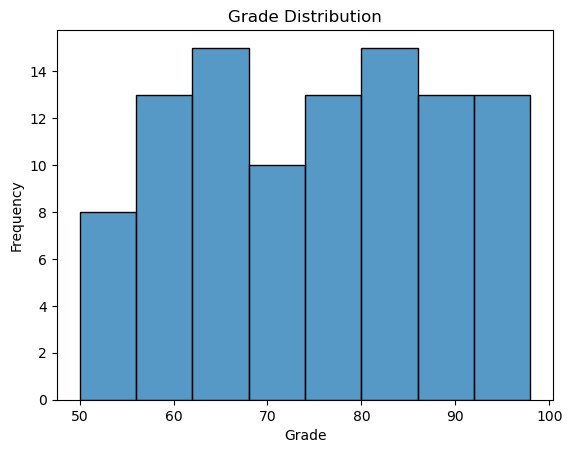

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of grades
sns.histplot(df['Grade'])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()


We can infer the following:

- Grade Range: The grades are spread between 50 and 100, which likely represents the range of possible scores for a course.
- Most Common Grades: The most frequent grades appear to be in the 70-80 range, with this bin having the highest frequency (the tallest bar).
- Distribution Shape: The distribution seems to be roughly uniform . This suggests that students' performances are relatively evenly distributed across the grade spectrum, with fewer students scoring in the 80-90 range compared to the adjacent ranges.

The bars are relatively even in height across the range of grades, suggesting a lack of strong skewness.
The distribution does not appear to tail off more sharply on one end than the other, which would indicate skewness.

Therefore, uniform distribution of grades is present

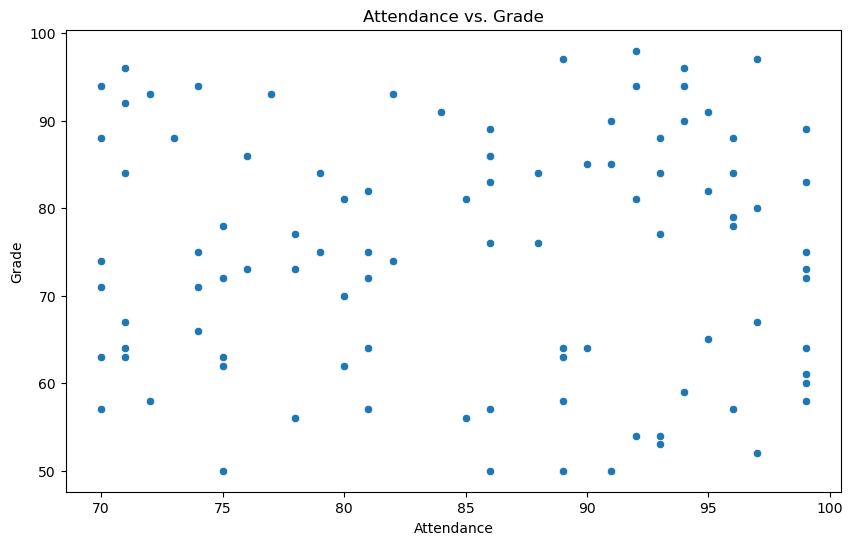

In [6]:
# Analyze how attendance correlates with grades
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Grade', data=df)
plt.title('Attendance vs. Grade')
plt.xlabel('Attendance')
plt.ylabel('Grade')
plt.show()


The scatter plot shows the relationship between attendance and grades for a group of students. From this visualization, we can infer the following:

- Spread of Data: The points are widely spread out across the plot, which suggests a lot of variability in grades at different levels of attendance.
- Correlation: There does not appear to be a clear trend or strong linear relationship between attendance and grades. Students with high attendance have grades across the spectrum, and the same is true for students with lower attendance.
- Concentration of Points: Many points are concentrated in the high attendance area, but their grades vary widely, not clustering around any particular grade level.

From this scatter plot, we can hypothesize that attendance alone may not be a strong predictor of a student's grade. There could be other factors at play that influence grades, or the relationship between attendance and grades may not be linear. 

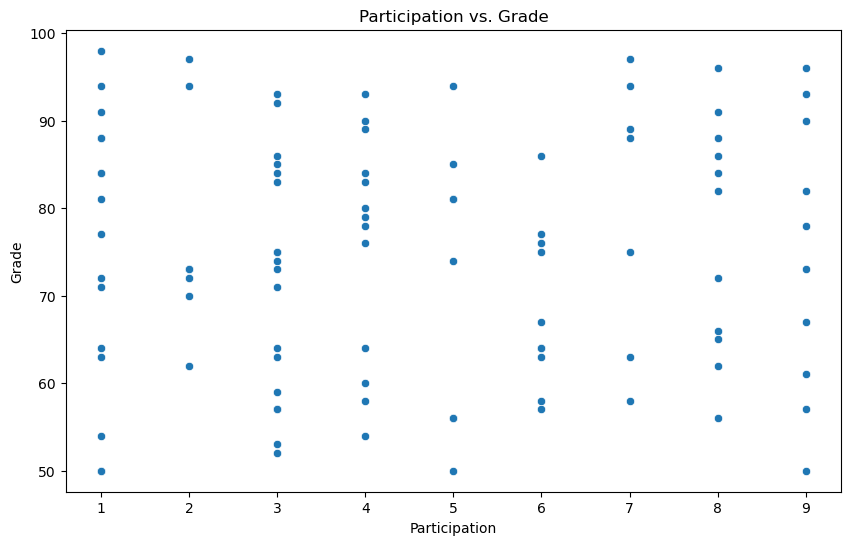

In [7]:
# Analyze how participation correlates with grades
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Participation', y='Grade', data=df)
plt.title('Participation vs. Grade')
plt.xlabel('Participation')
plt.ylabel('Grade')
plt.show()


The scatter plot presents the relationship between participation and grades. Here's what we can deduce from it:

- Variability: Similar to the attendance vs. grade plot, there is a wide spread of grades across levels of participation. This suggests variability in grades that cannot be solely explained by participation levels.
- Lack of a Clear Trend: There is no obvious upward or downward trend, indicating that participation, as measured here, is not a strong predictor of grade outcome.
- High Grades Across Participation Levels: Students with high grades are spread across all levels of participation, indicating that high participation does not necessarily result in high grades, nor does low participation always result in low grades.

Just like with the attendance vs. grade analysis, this suggests that other factors may be influencing grades more than participation or that the relationship is non-linear and might require different analytical methods to uncover.

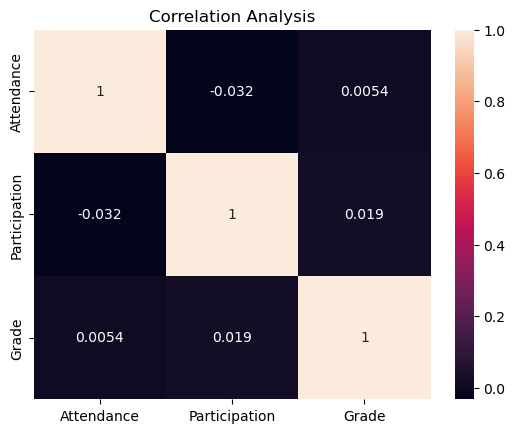

In [8]:
# Explore correlations between attendance, participation, and grades
correlation_matrix = df[['Attendance', 'Participation', 'Grade']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Analysis')
plt.show()


The correlation analysis in the heatmap shows the correlation coefficients between three variables: attendance, participation, and grades. The values range between -1 and 1, where:

A value close to 1 implies a strong positive correlation, meaning as one variable increases, the other tends to increase as well.
A value close to -1 implies a strong negative correlation, meaning as one variable increases, the other tends to decrease.
A value close to 0 implies little to no linear correlation between the variables.

The correlation coefficients in heatmap are:

- Attendance and Grade: 0.0054, which suggests a very weak positive correlation. This indicates that there is almost no linear relationship between attendance and grades in this dataset.
- Participation and Grade: 0.019, which is also a very weak positive correlation, indicating a negligible linear relationship between participation and grades.
- Attendance and Participation: -0.032, which suggests a very weak negative correlation. This means there's virtually no linear relationship, and slightly more, it suggests that higher attendance doesn't necessarily correlate with higher participation, or vice versa.

The analysis tells us that, at least linearly, neither attendance nor participation have a strong influence on the grades in this particular dataset. It might be interesting to investigate further with non-linear analyses or to consider other factors that could be affecting student performance.
